# Query Analysis

##### The purpose of this notebook is to look at gendered language between queries

In [2]:
import pandas as pd
import json
import os

In [3]:
q = pd.read_csv('all_queries_with_data.csv',index_col=False)

#### Begin analysis here

In [4]:
#read in our autocomplete and related searches dataframe
ac = pd.read_csv('all_queries_autocomplete.csv',index_col=False)
rs = pd.read_csv('all_queries_related.csv',index_col=False)

In [5]:
#drop the seed query column as it is not applicable for related searches
rs.drop(columns=['seed_query'],inplace=True)
rs.head()

,Query,Source,Date Added,(Num Occurances),city,candidate,gender
0,dianne morales stuyvesant,related searches,2021-04-27,NaN,NYC,dianne morales,W
1,john barros bio,related searches,2021-04-27,NaN,Boston,john barros,M
2,fernando mateo taxi,related searches,2021-04-27,NaN,NYC,fernando mateo,M
3,when was isaac wright jr released,related searches,2021-04-27,NaN,NYC,isaac wright jr,M
4,andrew yang parents,related searches,2021-04-27,NaN,NYC,andrew yang,M


Some initial exploration:

In [6]:
#let's take a look at the most common words in all queries
from collections import Counter
all_words = " ".join(q.Query.unique()).split()
Counter(all_words).most_common()

[('mayor', 710),
 ('mayoral', 601),
 ('yang', 528),
 ('andrew', 512),
 ('nyc', 501),
 ('eric', 455),
 ('adams', 455),
 ('boston', 403),
 ('is', 397),
 ('election', 364),
 ('michelle', 310),
 ('worth', 300),
 ('wu', 276),
 ('curtis', 262),
 ('for', 258),
 ('sliwa', 257),
 ('kim', 256),
 ('wright', 242),
 ('isaac', 240),
 ('how', 236),
 ('garcia', 235),
 ('kathryn', 226),
 ('new', 213),
 ('2021', 205),
 ('john', 205),
 ('scott', 205),
 ('campbell', 200),
 ('wiley', 200),
 ('janey', 198),
 ('maya', 198),
 ('andrea', 197),
 ('mcguire', 196),
 ('jr', 188),
 ('covid', 188),
 ('stringer', 186),
 ('york', 186),
 ('much', 173),
 ('barros', 170),
 ('race', 170),
 ('george', 165),
 ('santiago', 163),
 ('donovan', 163),
 ('jon', 160),
 ('ray', 160),
 ('annissa', 160),
 ('essaibi', 155),
 ('morales', 153),
 ('dianne', 151),
 ('shaun', 150),
 ('net', 147),
 ('candidates', 146),
 ('campaign', 140),
 ('of', 128),
 ('dana', 126),
 ('depelteau', 123),
 ('prince', 119),
 ('michael', 119),
 ('art', 116),


### 1. Gendered Lexicon
#### 1a. Identifying and counting gendered language

In order to see if there is a different amount of gendered language between women and men candidates, I found these words perusing the ones above

In [7]:
#gendered lexicon
gen_set = ['wife','married','daughter','husband','partner','family','kids','love','son','father','mother','children',
          'boy','girl','marriage']

Adding a column to the dataframe that will be a count of how many gendered words are in that query

In [8]:
def add_gender_language(query):
    count = 0
    for word in gen_set:
        if word in query.lower(): 
            count = count+1
    return count

ac['gen_count'] = ac.Query.apply(add_gender_language)
rs['gen_count'] = rs['Query'].apply(add_gender_language)

In [9]:
ac.head()

,Query,Source,Date Added,(Num Occurances),city,seed_query,candidate,gender,gen_count
0,jon santiago races 2021,autocomplete,2021-04-27,NaN,Boston,jon santiago race,jon santiago,M,0
1,isaac wright jr daughter instagram,autocomplete,2021-04-27,NaN,NYC,isaac wright jr,isaac wright jr,M,1
2,john barros wiki,autocomplete,2021-04-27,NaN,Boston,john barros,john barros,M,0
3,scott stringer backgrounds,autocomplete,2021-04-27,NaN,NYC,scott stringer background,scott stringer,M,0
4,art chang mayor election results 2018,autocomplete,2021-04-27,NaN,NYC,art chang,art chang,M,0


In [10]:
rs.head()

,Query,Source,Date Added,(Num Occurances),city,candidate,gender,gen_count
0,dianne morales stuyvesant,related searches,2021-04-27,NaN,NYC,dianne morales,W,0
1,john barros bio,related searches,2021-04-27,NaN,Boston,john barros,M,0
2,fernando mateo taxi,related searches,2021-04-27,NaN,NYC,fernando mateo,M,0
3,when was isaac wright jr released,related searches,2021-04-27,NaN,NYC,isaac wright jr,M,0
4,andrew yang parents,related searches,2021-04-27,NaN,NYC,andrew yang,M,0


#### 1b. Assessing Significance: T-Test
What's the difference between the average number of gendered words in queries about men and women? Let's do a t-test

In [11]:
from scipy import stats
stats.ttest_ind(ac[ac.gender=='M']['gen_count'], ac[ac.gender=='W']['gen_count'])

Ttest_indResult(statistic=-29.384249841720973, pvalue=1.593944112465022e-188)

In [12]:
from scipy import stats
stats.ttest_ind(rs[rs.gender=='M']['gen_count'], rs[rs.gender=='W']['gen_count'])

Ttest_indResult(statistic=-32.56089307201438, pvalue=5.198353919866002e-231)

#### 1c. Visualizing Analysis
For each gender and type, let's calculate the proportion of no gendered language (0) and some gendered language (1 or 2). I just did this by writing out the calculations since I couldn't figure out a more elegant solution in time, but shoud change this in the future perhaps

In [13]:
rs[rs.gender=='M'].gen_count.value_counts()

0    35631
1     7927
Name: gen_count, dtype: int64

In [14]:
rs[rs.gender == 'W'].gen_count.value_counts()

0    24990
1     9680
Name: gen_count, dtype: int64

In [15]:
gdict = [['autocomplete','Men',31609/(31609+5715+13)*100, 5715/(31609+5715+13)*100, 13/(31609+5715+13)*100],
         ['autocomplete','Women',19901/(19901+6501+2)*100, 6501/(19901+6501+2)*100, 2/(19901+6501+2)*100],
         ['related searches','Men',35361/(35631+7927)*100, 7927/(35631+7927)*100, 0],
        ['related searches','Women',24990/(24990+9680)*100, 9680/(24990+9680)*100,0]
        ]
graph_df = pd.DataFrame(gdict,columns=['type','gender','proportion_0','proportion_1','proportion_2'])
graph_df

,type,gender,proportion_0,proportion_1,proportion_2
0,autocomplete,Men,84.658650,15.306532,0.034818
1,autocomplete,Women,75.371156,24.621270,0.007575
2,related searches,Men,81.181413,18.198724,0.000000
3,related searches,Women,72.079608,27.920392,0.000000


In [16]:
#a more simplified version below for plotting ease

In [17]:
df_graph = pd.DataFrame({'Type': ['Auto-Men', 'Auto-Women', 'Related-Men', 'Related-Women'],
                   'No Gendered Language': [84.7, 75.4, 81.2, 72],
                   'Some Gendered Language': [15.3, 24.6, 18.2, 27.9]
                  })

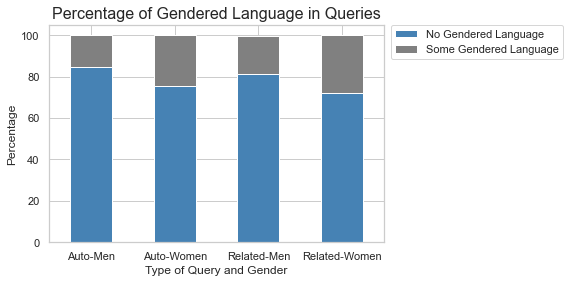

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
df_graph.set_index('Type').plot(kind='bar', stacked=True, color=['steelblue', 'grey'])

plt.title('Percentage of Gendered Language in Queries', fontsize=16)

#add axis titles
plt.xlabel('Type of Query and Gender')
plt.ylabel('Percentage')

#rotate x-axis labels
plt.xticks(rotation=0)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('percen_gendered_language.png', dpi=1000, bbox_inches='tight',format='png')

In [20]:
#find average percentage for just women and men
df_graph
men = (15.3+18.2)/2
women = (24.6+27.9)/2
print('men:',men,'women:',women)

men: 16.75 women: 26.25


### 2. Exploring Top Queries 
#### 2a. Standardize queries by replacing a candidate name with [candidate]

In [18]:
q['clean_query'] = q.apply(lambda x: x['Query'].replace(str(x['candidate']),'[candidate]'),axis=1)
rs['clean_query'] = rs.apply(lambda x: x['Query'].replace(str(x['candidate']),'[candidate]'),axis=1)
ac['clean_query'] = ac.apply(lambda x: x['Query'].replace(str(x['candidate']),'[candidate]'),axis=1)
q.clean_query.unique()

array(['[candidate] races 2021', '[candidate] daughter instagram',
       '[candidate] wiki', ...,
       'new york city mayoral race candidates 2021',
       'new jersey governor race',
       '[candidate] opinion on economy and jobs'], dtype=object)

In [19]:
q.head()

,Query,Source,Date Added,(Num Occurances),city,seed_query,candidate,gender,clean_query
0,jon santiago races 2021,autocomplete,2021-04-27,NaN,Boston,jon santiago race,jon santiago,M,[candidate] races 2021
1,isaac wright jr daughter instagram,autocomplete,2021-04-27,NaN,NYC,isaac wright jr,isaac wright jr,M,[candidate] daughter instagram
2,john barros wiki,autocomplete,2021-04-27,NaN,Boston,john barros,john barros,M,[candidate] wiki
3,scott stringer backgrounds,autocomplete,2021-04-27,NaN,NYC,scott stringer background,scott stringer,M,[candidate] backgrounds
4,art chang mayor election results 2018,autocomplete,2021-04-27,NaN,NYC,art chang,art chang,M,[candidate] mayor election results 2018


#### 2b. Autocomplete top query analysis
Let's start with the autocomplete dataset. First we're going to make lists of all the queries about women candidates and men

In [20]:
women_queries = ac[ac.gender=='W'].clean_query
men_queries = ac[ac.gender=='M'].clean_query

Next, we'll do a counter of those queries and turn that into a dataframe so we can easily sort it to get the most frequent values and set a threshold of what will be our minimum frequency count (400 instances)

In [28]:
dfw = pd.DataFrame.from_dict(Counter(women_queries), orient='index').reset_index()
dfw = dfw.rename(columns={'index':'query',0:'count'})
dfw_top = dfw[dfw['count']>400].sort_values(by='count') #,ascending=False)

dfm = pd.DataFrame.from_dict(Counter(men_queries), orient='index').reset_index()
dfm = dfm.rename(columns={'index':'query',0:'count'})
dfm_top = dfm[dfm['count']>400].sort_values(by='count') #,ascending=False)

In [ ]:
#percentages
dfw = pd.DataFrame.from_dict(Counter(women_queries), orient='index').reset_index()
dfw_total_num_queries = len(women_queries)
dfw = dfw.rename(columns={'index':'query',0:'percentage'})
dfw['percentage'] = dfw['percentage'].apply(lambda x: x/dfw_total_num_queries)
dfw_top = dfw[dfw['percentage']>1].sort_values(by='percentage') #,ascending=False)


dfm = pd.DataFrame.from_dict(Counter(men_queries), orient='index').reset_index()
dfm_total_num_queries = len(men_queries)
dfm = dfm.rename(columns={'index':'query',0:'percentage'})
dfm['percentage'] = dfm['percentage'].apply(lambda x: x/dfm_total_num_queries)
dfm_top = dfm[dfm['percentage']>1].sort_values(by='percentage') #,ascending=False)

In [29]:
dfm_top

,query,percentage


Finally, we can plot it to see the results 

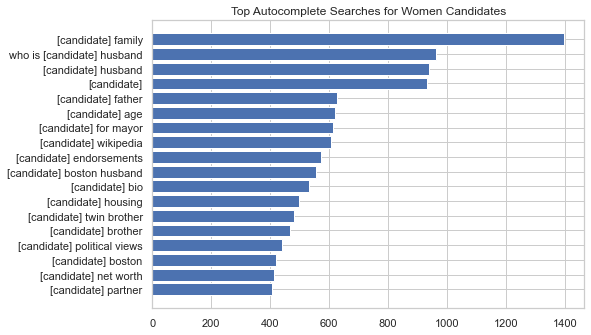

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(dfw_top['query'], dfw_top['count'])
plt.title('Top Autocomplete Searches for Women Candidates')
plt.savefig('women_freq_autocomplete.png', dpi=1000, bbox_inches='tight',format='png')
plt.show()

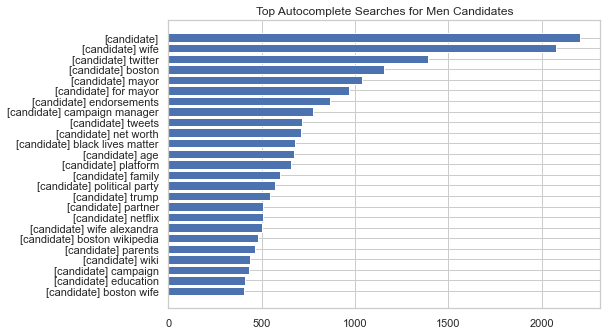

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(dfm_top['query'], dfm_top['count'])
plt.title('Top Autocomplete Searches for Men Candidates')
plt.savefig('men_freq_autocomplete.png', dpi=1000, bbox_inches='tight',format='png')
plt.show()

#### 2c. Related Search top query analysis
This code below will all be the same as part 2b but switched for related searches

In [49]:
women_queries = rs[rs.gender=='W'].clean_query
men_queries = rs[rs.gender=='M'].clean_query

In [53]:
dfw = pd.DataFrame.from_dict(Counter(women_queries), orient='index').reset_index()
dfw = dfw.rename(columns={'index':'query',0:'count'})
dfw_top = dfw[dfw['count']>500].sort_values(by='count') #,ascending=False)

dfm = pd.DataFrame.from_dict(Counter(men_queries), orient='index').reset_index()
dfm = dfm.rename(columns={'index':'query',0:'count'})
dfm_top = dfm[dfm['count']>500].sort_values(by='count') #,ascending=False)

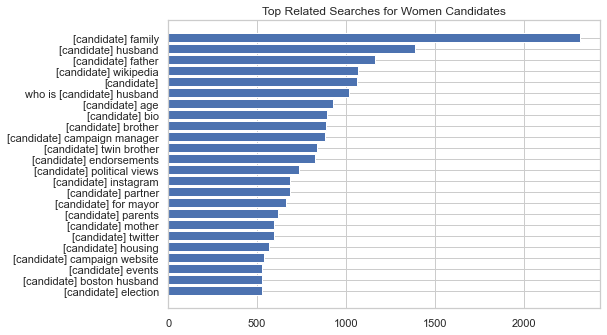

In [54]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(dfw_top['query'], dfw_top['count'])
plt.title('Top Related Searches for Women Candidates')
plt.savefig('women_freq_related.png', dpi=1000, bbox_inches='tight',format='png')
plt.show()

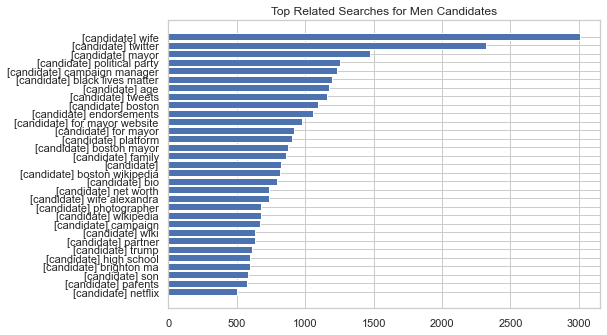

In [55]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(dfm_top['query'], dfm_top['count'])
plt.title('Top Related Searches for Men Candidates')
plt.savefig('men_freq_related.png', dpi=1000, bbox_inches='tight',format='png')
plt.show()